# Linear Regression

In [41]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def set_default(figsize=(8, 5), dpi=100):
    plt.style.use(["dark_background", "bmh"])
    plt.rc("axes", facecolor="k")
    plt.rc("figure", facecolor="k")
    plt.rc("figure", figsize=figsize, dpi=dpi)


set_default()

In [43]:
# Dataset

x_train = np.random.rand(
    100,
)  # 100 random numbers between 0 and 1

noise = np.random.normal(
    0,
    0.1,
    x_train.shape,
)  # 100 random numbers with normal distribution

y_train = x_train * 2 + 5 + noise

x_train = x_train.astype(np.float32)
noise = noise.astype(np.float32)
y_train = y_train.astype(np.float32)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [44]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 200
learning_rate = 0.01

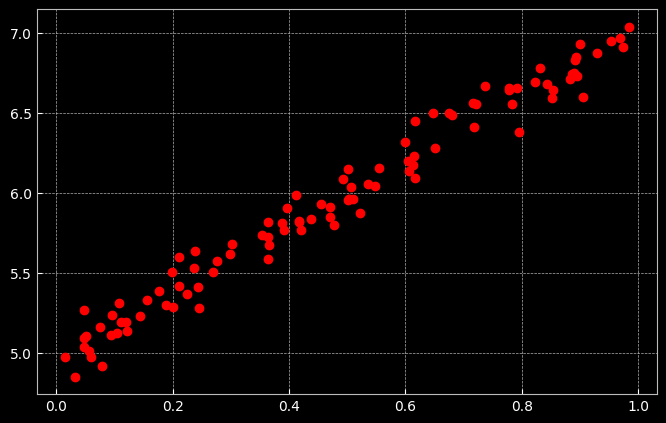

In [45]:
# plot the training data
plt.plot(x_train, y_train, "ro", label="Original data")

In [46]:
# Linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim, bias=True)

    def forward(self, x):
        return self.linear(x)

In [47]:
model = LinearRegression(input_size, output_size)

# check the parameters of the linear model
for name, param in model.named_parameters():
    print(name, param)

linear.weight Parameter containing:
tensor([[-0.1432]], requires_grad=True)
linear.bias Parameter containing:
tensor([0.2460], requires_grad=True)


In [48]:
# Loss Function
criterion = nn.MSELoss()

# Optimizer, Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [49]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model.forward(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()  # clear the gradients, otherwise they will accumulate
    loss.backward()  # compute the gradients
    optimizer.step()  # update the weights

    # print the loss every 5 epochs
    if (epoch + 1) % 5 == 0:
        print("------")
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))
        for name, param in model.named_parameters():
            print(name, param)

# Save the model checkpoint
# torch.save(model.state_dict(), "model.ckpt")

------
Epoch [5/200], Loss: 27.5803
linear.weight Parameter containing:
tensor([[0.1355]], requires_grad=True)
linear.bias Parameter containing:
tensor([0.7953], requires_grad=True)
------
Epoch [10/200], Loss: 21.4453
linear.weight Parameter containing:
tensor([[0.3812]], requires_grad=True)
linear.bias Parameter containing:
tensor([1.2797], requires_grad=True)
------
Epoch [15/200], Loss: 16.6755
linear.weight Parameter containing:
tensor([[0.5977]], requires_grad=True)
linear.bias Parameter containing:
tensor([1.7068], requires_grad=True)
------
Epoch [20/200], Loss: 12.9671
linear.weight Parameter containing:
tensor([[0.7885]], requires_grad=True)
linear.bias Parameter containing:
tensor([2.0835], requires_grad=True)
------
Epoch [25/200], Loss: 10.0840
linear.weight Parameter containing:
tensor([[0.9567]], requires_grad=True)
linear.bias Parameter containing:
tensor([2.4158], requires_grad=True)
------
Epoch [30/200], Loss: 7.8425
linear.weight Parameter containing:
tensor([[1.104

linear.weight Parameter containing:
tensor([[2.1699]], requires_grad=True)
linear.bias Parameter containing:
tensor([4.8751], requires_grad=True)


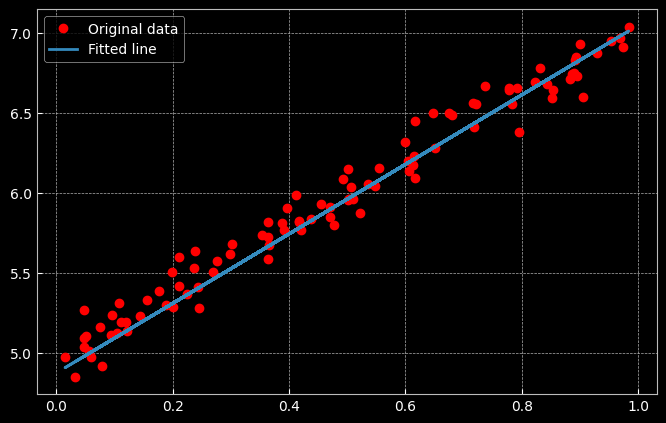

In [50]:
# Plot the graph
inputs = torch.from_numpy(x_train)

predicted = model.forward(inputs).detach().numpy()
for name, param in model.named_parameters():
    print(name, param)
plt.plot(x_train, y_train, "ro", label="Original data")
plt.plot(x_train, predicted, label="Fitted line")
plt.legend()
plt.show()